## Example of Solving Quadratic Eigenvalue Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import sympy

sympy.init_printing()

In [2]:
def cheb(N, x_minus, x_plus):
    def get_a_j(x, j):
        a = 1
        for k in range(len(x)):
            if k != j:
                a *= x[j] - x[k]
        return a

    x = (x_plus + x_minus) / 2 + (x_plus - x_minus) / 2 * np.cos(np.pi * np.arange(0, N + 1) / N)

    D = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        a_i = get_a_j(x, i)
        for j in range(N + 1):
            if j != i:
                # diagonal element
                D[i, i] += 1 / (x[i] - x[j])
                # off diagonal element
                a_j = get_a_j(x, j)
                D[i, j] = a_i / (a_j * (x[i] - x[j]))

    return D, x

In [3]:
x_minus = 0.01
x_plus = 0.99
N = 16

In [4]:
D, x_vals = cheb(N, x_minus, x_plus)

In [5]:
D2 = D @ D

In [6]:
fac1 = [-3 * x / 2 for x in x_vals]
term1 = [3 * (1 - 1 / (2 * (1 - x))) for x in x_vals]
block_1 = np.diag(fac1) @ D + np.diag(term1)

In [7]:
fac2 = [x * (1 - x) for x in x_vals]
fac3 = [1 + 3 * x for x in x_vals]
term2 = [4 * x / (1 - x) - 1 / x for x in x_vals]
block_2 = np.diag(fac2) @ D2 + np.diag(fac3) @ D + np.diag(term2)

In [8]:
A = np.block([
    [block_1, block_2],
    [np.ones(block_1.shape), np.zeros(block_1.shape)]
])
A

array([[-406.11734694,  315.44693948,  -79.62673759, ...,   15.70783251,
         -15.25780742,    7.55581008],
       [ -78.11173487,  -35.58200083,   52.75021025, ...,   -3.10700802,
           3.01810418,   -1.49461141],
       [  19.1566844 ,  -51.25021025,  -19.51376028, ...,    3.51048688,
          -3.40879046,    1.68788415],
       ...,
       [   1.        ,    1.        ,    1.        , ...,    0.        ,
           0.        ,    0.        ],
       [   1.        ,    1.        ,    1.        , ...,    0.        ,
           0.        ,    0.        ],
       [   1.        ,    1.        ,    1.        , ...,    0.        ,
           0.        ,    0.        ]])

In [9]:
B = np.block([
    [1./2 * np.ones(block_1.shape), np.zeros(block_1.shape)],
    [np.zeros(block_1.shape), np.ones(block_1.shape)]
])
B

array([[0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 1. , 1. ],
       [0. , 0. , 0. , ..., 1. , 1. , 1. ],
       [0. , 0. , 0. , ..., 1. , 1. , 1. ]])

In [10]:
bc1 = np.zeros(len(x_vals) * 2)
bc1[len(x_vals)] = 1
bc1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
bc2 = np.zeros(len(x_vals) * 2)
bc2[-1] = 1
bc2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [12]:
A[0] = bc1
A[-1] = bc2
A

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-78.11173487, -35.58200083,  52.75021025, ...,  -3.10700802,
          3.01810418,  -1.49461141],
       [ 19.1566844 , -51.25021025, -19.51376028, ...,   3.51048688,
         -3.40879046,   1.68788415],
       ...,
       [  1.        ,   1.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [  1.        ,   1.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ]])

In [13]:
B[0] = 0
B[-1] = 0
B

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 1. , 1. ],
       [0. , 0. , 0. , ..., 1. , 1. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [14]:
w, v = linalg.eig(A, B)

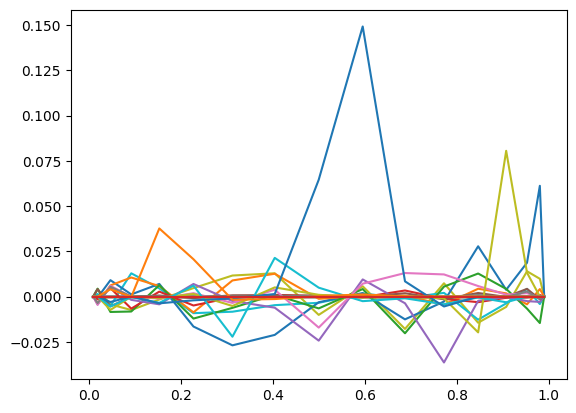

In [15]:
plt.plot(x_vals, v[N + 1:, :]);

#### Mathieu Operator

In [16]:
N = 42
x_minus = 0
x_plus = 2 * np.pi

In [17]:
D, x_vals = cheb(N, x_minus, x_plus)

In [18]:
D2 = D @ D

In [19]:
N = 42
h = 2*np.pi/N
x = h * np.arange(1, N + 1)

In [20]:
c = [-np.pi ** 2 / (3 * h ** 2) - 1/6] + [-.5 * (-1) ** xx / np.sin(h * xx/2) ** 2 for xx in range(1, N)]

In [21]:
D2 = linalg.toeplitz(c)
D2

array([[-147.16666667,   89.53213731,  -22.50873632, ...,   10.09783468,
         -22.50873632,   89.53213731],
       [  89.53213731, -147.16666667,   89.53213731, ...,   -5.75502386,
          10.09783468,  -22.50873632],
       [ -22.50873632,   89.53213731, -147.16666667, ...,    3.74604612,
          -5.75502386,   10.09783468],
       ...,
       [  10.09783468,   -5.75502386,    3.74604612, ..., -147.16666667,
          89.53213731,  -22.50873632],
       [ -22.50873632,   10.09783468,   -5.75502386, ...,   89.53213731,
        -147.16666667,   89.53213731],
       [  89.53213731,  -22.50873632,   10.09783468, ...,  -22.50873632,
          89.53213731, -147.16666667]])

In [22]:
qq = np.arange(0, 15, 0.2)

data = []
for q in qq:
    e = sorted(linalg.eigvals(-D2 + 2 * q * np.diag(np.cos(2 * x))))
    e = [np.real(ar) for ar in e if ~np.iscomplex(ar)]  # limit to real eigenvalues
    data.append(e[:11])

data = np.array(data)

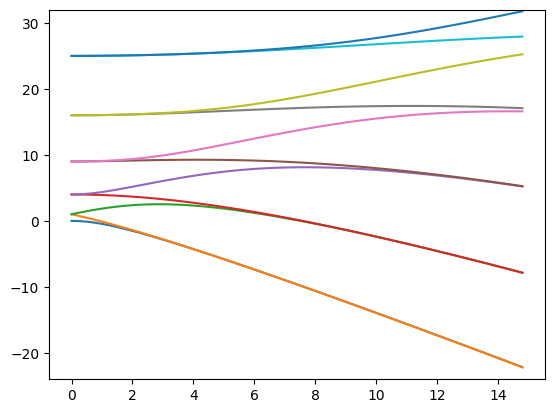

In [23]:
plt.plot(qq, data)
plt.ylim(-24, 32);